In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mK as mK
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.Get_groups import phase_diagram,make_meanr

from TO_sim.gen_Distribution import Normal
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm.notebook import tqdm
from scipy.signal import find_peaks
import parmap

In [263]:
seed =10
N = 500
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = omega
omega = np.sort(omega)
m = 4
t = np.arange(0,1500,0.1)
K = 2.5
to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)
new_theta = to_ppi(theta)
dtheta_c = np.cumsum(dtheta,axis=0)
sum_time = 500
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

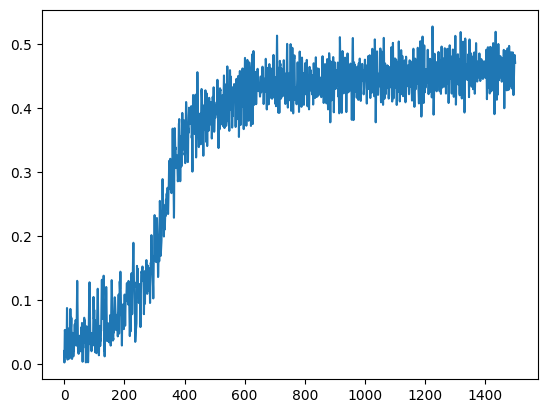

In [264]:
plt.plot(t,rs)

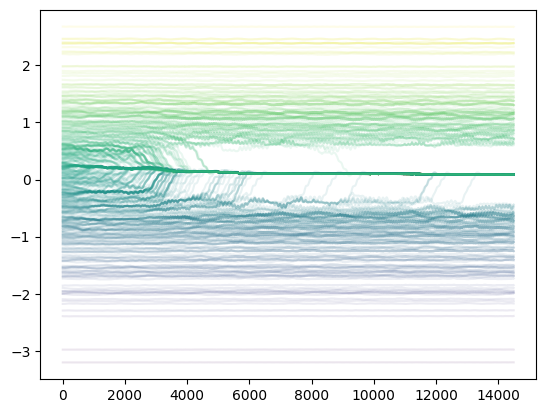

In [265]:
ln = plt.plot(avg_dtheta,alpha=0.1,color ='blue');
NORM = lambda x :(x-np.min(x))/(np.max(x)-np.min(x))
color = plt.cm.viridis(NORM(omega))
for i,l in enumerate(ln):
    l.set_color(color[i])

In [266]:
def get_cluster(peaks,num):
    peaks = peaks[np.where((peaks<N)&(peaks>1))]
    peaks_new = [peaks[0],*peaks]
    psize = np.diff(peaks_new)
    arg_psize = np.argsort(psize)[::-1] 
    c_l,c_r = arg_psize[num],arg_psize[num]+1
    cluster = np.array([peaks_new[c_l]+1,peaks_new[c_r]-1])
    size = np.diff(np.array([peaks_new[c_l],peaks_new[c_r]-1]))
    return cluster,size



def near_main(peaks):
    num = 0
    peaks = peaks[np.where((peaks<N)&(peaks>1))]
    peaks_new = [peaks[0],*peaks]
    psize = np.diff(peaks_new)
    arg_psize = np.argsort(psize)[::-1] 
    left_l,left_r = arg_psize[num]-1,arg_psize[num]
    l_cluster = np.array([peaks_new[left_l]+1,peaks_new[left_r]-1])
    
    right_l,right_r = arg_psize[num]+1,arg_psize[num]+2
    r_cluster = np.array([peaks_new[right_l]+1,peaks_new[right_r]-1])
    return l_cluster,r_cluster


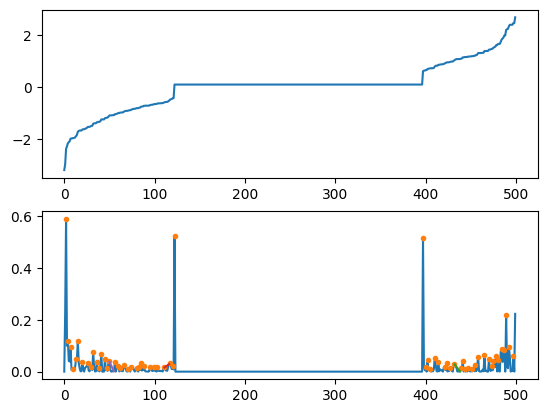

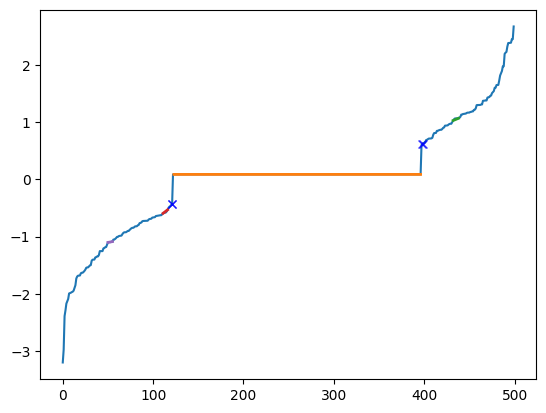

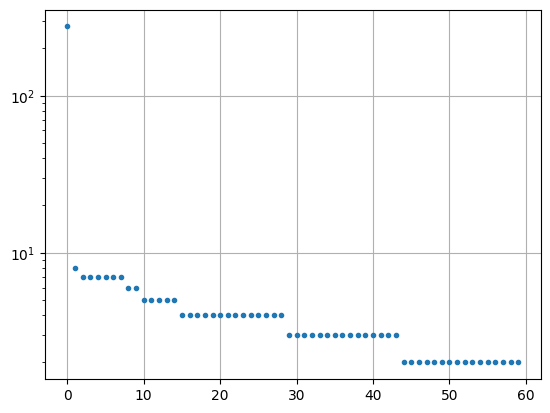

In [267]:
plt.subplot(211)
index = -1
arg = np.argsort(avg_dtheta[index])
SD = avg_dtheta[index][arg]
plt.plot(SD)
# plt.plot(avg_dtheta[1500])

plt.subplot(212)

diff_dtheta = np.diff([SD[0],*SD])

plt.plot(diff_dtheta)
peaks, P  = find_peaks(diff_dtheta, height=0.01)
HP = P['peak_heights']
# peaks = peaks[p_arg]
# peaks = peaks[np.where((peaks<N)&(peaks>1))]

# peaks_new = [peaks[0],*peaks]
# psize = np.diff(peaks_new)
# arg_psize = np.argsort(psize)[::-1] 
C_0,S_0 = get_cluster(peaks,0)
C_1,S_1 = get_cluster(peaks,1)
C_2,S_2 = get_cluster(peaks,2)
C_3,S_3 = get_cluster(peaks,3)
l_c,r_c = near_main(peaks)
max_s = np.sort(diff_dtheta[peaks])[::-1][:2]
# plt.plot(0.01/diff_dtheta)
plt.plot(peaks,diff_dtheta[peaks],'.')
plt.plot(C_1,diff_dtheta[np.array(C_1)])
plt.plot(C_2,diff_dtheta[np.array(C_2)])
plt.plot(C_3,diff_dtheta[np.array(C_3)])
# plt.yscale('log')

# plt.ylim(0,10)
plt.figure()

SD = avg_dtheta[index,arg]
plt.plot(SD)
plt.plot(np.arange(N)[np.array(C_0)],SD[np.array(C_0)],lw=2,ls='-')
plt.plot(np.arange(N)[np.array(C_1)],SD[np.array(C_1)],lw=2,ls='-')
plt.plot(np.arange(N)[np.array(C_2)],SD[np.array(C_2)],lw=2,ls='-')
plt.plot(np.arange(N)[np.array(C_3)],SD[np.array(C_3)],lw=2,ls='-')
plt.plot(np.arange(N)[l_c],SD[l_c],lw=2,ls=':',color ='blue',alpha=0.7,marker='x')
plt.plot(np.arange(N)[r_c],SD[r_c],lw=2,ls=':',color ='blue',alpha=0.7,marker='x')
plt.figure()
plt.plot(np.sort(np.diff(peaks))[::-1],'.')
plt.yscale('log')

plt.grid()

In [269]:
omega_p = lambda r,K=K,m=m : 4/np.pi*np.sqrt(K*r/m)
omega_d = lambda r,K=K : K*r

In [270]:
np.where(dtheta[init:init+interval]>0,dtheta[init:init+interval],np.nan)[-1][249]

0.14105299541666794

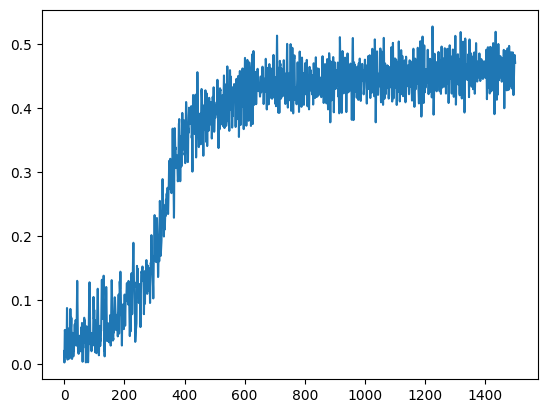

In [271]:
plt.plot(t,rs)

In [272]:
cluster_0 = arg[C_0[0]:C_0[1]]
cluster_1 = arg[C_1[0]:C_1[1]]
cluster_2 = arg[C_2[0]:C_2[1]]
cluster_3 = arg[C_3[0]:C_3[1]]
cluster_l = arg[l_c[0]:l_c[1]]
cluster_r = arg[r_c[0]:r_c[1]]

C:\Users\kim9y\AppData\Local\Temp\ipykernel_13568\4028218456.py:13: RuntimeWarning: invalid value encountered in divide
  NORM = lambda x :(x-np.min(x))/(np.max(x)-np.min(x))


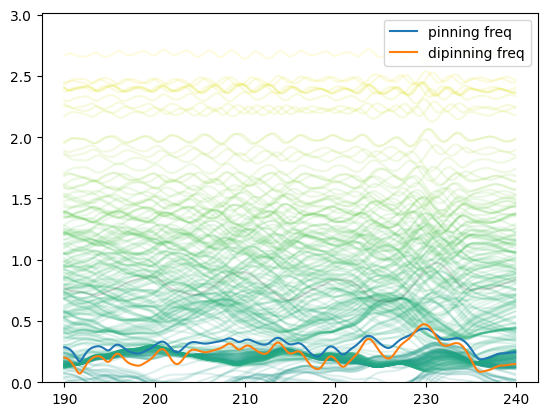

In [273]:
init =1900
interval = 500 

plt.plot(t[init:init+interval],omega_p(rs[init:init+interval]),label ='pinning freq',zorder=3)
plt.plot(t[init:init+interval],omega_d(rs[init:init+interval]),label ='dipinning freq',zorder=3)
ax = plt.gca()
ln = plt.plot(t[init:init+interval],dtheta[init:init+interval],color = 'blue',alpha=0.15)
plt.legend(loc=1)
plt.ylim(0)

# ax2 = ax.twinx()
# ax2.plot(t[init:init+interval],rs[init:init+interval],color='tab:red',label ='order parameter')
NORM = lambda x :(x-np.min(x))/(np.max(x)-np.min(x))
color = plt.cm.viridis(NORM(omega))
color_main = plt.cm.bwr(NORM(omega[cluster_0]))
color_r = plt.cm.plasma(NORM(omega[cluster_r]))

for i,l in enumerate(ln):
    l.set_color(color[i])

j = 0
for i,l in enumerate(ln):
    if i in cluster_r:
        l.set_color(color_r[j])
        j+=1

In [274]:
len(rs)

15000

In [293]:
o_p = omega_p(rs)
o_d = omega_d(rs)

In [276]:
c_op= np.cumsum(o_p,axis=0)
sum_time = 500
avg_op = (c_op[sum_time:]-c_op[:-sum_time])/sum_time
std_op = [np.std(o_p[i:sum_time+i]) for i in range(len(o_p)-sum_time)]
min_op = [np.min(o_p[i:sum_time+i]) for i in range(len(o_p)-sum_time)]
max_op = [np.max(o_p[i:sum_time+i]) for i in range(len(o_p)-sum_time)]
# data = np
mean_main = np.mean(avg_dtheta[:,cluster_0],axis=1)

In [294]:
c_od= np.cumsum(o_d,axis=0)
sum_time = 500
avg_od = (c_od[sum_time:]-c_od[:-sum_time])/sum_time
std_od = [np.std(o_d[i:sum_time+i]) for i in range(len(o_d)-sum_time)]
min_od = [np.min(o_d[i:sum_time+i]) for i in range(len(o_d)-sum_time)]
max_od = [np.max(o_d[i:sum_time+i]) for i in range(len(o_d)-sum_time)]
# data = np
mean_main = np.mean(avg_dtheta[:,cluster_0],axis=1)

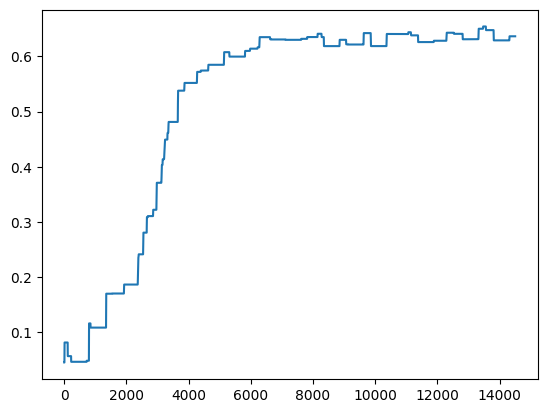

In [277]:
plt.plot(min_op)

In [285]:
drift_cluster = np.array(list(set(arg) - set(cluster_0)))

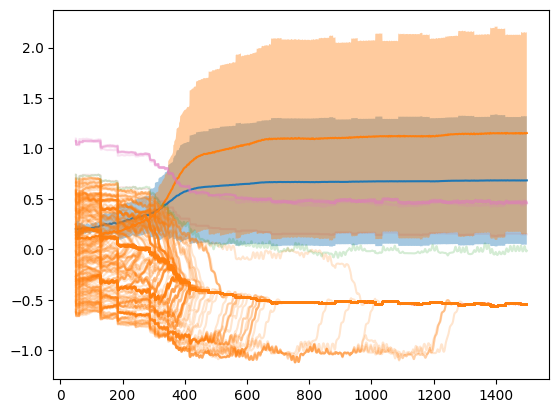

In [302]:
plt.plot(t[sum_time:],avg_op)
plt.plot(t[sum_time:],avg_od)
plt.fill_between(t[sum_time:],avg_op-min_op,avg_op+min_op,alpha=0.4)
plt.fill_between(t[sum_time:],avg_od-min_od,avg_od+min_od,alpha=0.4)
add = min_op
# add = np.zeros_like(min_op)
# add = mean_main
plt.plot(t[sum_time:],[omega[cluster_r]-add[i] for i in range(len(t[sum_time:])) ],alpha=0.1,color = 'tab:red')
# plt.plot(t[sum_time:],[omega[cluster_3]-mean_main[i] for i in range(len(t[sum_time:])) ],alpha=0.1,color = 'tab:red')
plt.plot(t[sum_time:],(avg_dtheta[:,cluster_0].T -add).T,alpha=0.2,color ='tab:orange')
plt.plot(t[sum_time:],(avg_dtheta[:,cluster_r].T -add).T,alpha=0.2,color = 'tab:green');
plt.plot(t[sum_time:],(abs(avg_dtheta[:,cluster_3].T) -add).T,alpha=0.2,color = 'tab:pink');

# plt.plot(t[sum_time:],[abs(omega[drift_cluster])-add[i] for i in range(len(t[sum_time:])) ],alpha=0.1,color = 'tab:purple');

# plt.plot(t[sum_time:],(abs(avg_dtheta[:,drift_cluster].T) -add).T,alpha=0.1,color = 'tab:red');
# plt.plot(std_op)

# plt.xlim(0,2000)